In [1]:
import torch
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

print("PyTorch version:", torch.__version__)
print("NumPy version:", np.__version__)
print("pandas version:", pd.__version__)


PyTorch version: 2.8.0+cpu
NumPy version: 2.2.6
pandas version: 2.3.3


In [3]:
!pip install kaggle


   ---------------------------------------- 0.0/181.2 kB ? eta -:--:--
   -- ------------------------------------- 10.2/181.2 kB ? eta -:--:--
   ---- ---------------------------------- 20.5/181.2 kB 217.9 kB/s eta 0:00:01
   --------------- ----------------------- 71.7/181.2 kB 558.5 kB/s eta 0:00:01
   ---------------------------------------- 181.2/181.2 kB 1.2 MB/s eta 0:00:00


In [5]:
kaggle --version

NameError: name 'kaggle' is not defined

In [ ]:
chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets list -s "skin cancer"


ref                                                               title                                                 size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  ---------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
kmader/skin-cancer-mnist-ham10000                                 Skin Cancer MNIST: HAM10000                     5582914511  2018-09-20 20:36:13.037000         214941       2143  0.7058824        
nodoubttome/skin-cancer9-classesisic                              Skin Cancer ISIC                                1647873564  2019-08-26 18:59:21.257000          28049        279  0.75             
surajghuwalewala/ham1000-segmentation-and-classification          Skin cancer: HAM10000                           2781385274  2021-05-27 09:08:46.813000          16000        125  0.9411765        
farjanakab

In [7]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000


Dataset URL: https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000
License(s): CC-BY-NC-SA-4.0




  0%|          | 0.00/5.20G [00:00<?, ?B/s]
  1%|          | 52.0M/5.20G [00:00<00:10, 537MB/s]
  2%|1         | 104M/5.20G [00:00<00:10, 509MB/s] 
  3%|2         | 153M/5.20G [00:00<00:11, 493MB/s]
  4%|3         | 204M/5.20G [00:00<00:10, 508MB/s]
  5%|4         | 253M/5.20G [00:00<00:10, 508MB/s]
  6%|5         | 303M/5.20G [00:00<00:10, 511MB/s]
  7%|6         | 352M/5.20G [00:00<00:10, 489MB/s]
  7%|7         | 399M/5.20G [00:00<00:11, 448MB/s]
  8%|8         | 443M/5.20G [00:01<00:12, 416MB/s]
  9%|9         | 484M/5.20G [00:01<00:12, 419MB/s]
 10%|9         | 525M/5.20G [00:01<00:11, 420MB/s]
 11%|#         | 567M/5.20G [00:01<00:11, 425MB/s]
 11%|#1        | 608M/5.20G [00:01<00:12, 391MB/s]
 12%|#2        | 646M/5.20G [00:01<00:12, 383MB/s]
 13%|#2        | 683M/5.20G [00:01<00:13, 350MB/s]
 13%|#3        | 718M/5.20G [00:01<00:13, 349MB/s]
 14%|#4        | 762M/5.20G [00:01<00:12, 378MB/s]
 15%|#5        | 803M/5.20G [00:02<00:12, 377MB/s]
 16%|#5        | 840M/5.20G [00:02<

In [8]:
import zipfile

with zipfile.ZipFile("skin-cancer-mnist-ham10000.zip", 'r') as zip_ref:
    zip_ref.extractall("ham10000")


In [9]:
import os
import shutil
import pandas as pd
from tqdm import tqdm

# Paths
base_dir = "ham10000"   # your unzipped folder
metadata_path = os.path.join(base_dir, "HAM10000_metadata.csv")
images_part1 = os.path.join(base_dir, "HAM10000_images_part_1")
images_part2 = os.path.join(base_dir, "HAM10000_images_part_2")

# Output folder
output_dir = "dataset"
os.makedirs(output_dir, exist_ok=True)

# Load metadata
df = pd.read_csv(metadata_path)
print("Total images in metadata:", len(df))

# Create class folders
labels = df["dx"].unique()
for label in labels:
    os.makedirs(os.path.join(output_dir, label), exist_ok=True)

# Combine images from both parts
all_images = {img: os.path.join(images_part1, img) for img in os.listdir(images_part1)}
all_images.update({img: os.path.join(images_part2, img) for img in os.listdir(images_part2)})

# Move each image to its class folder
for _, row in tqdm(df.iterrows(), total=len(df)):
    img_name = row["image_id"] + ".jpg"
    label = row["dx"]
    src_path = all_images.get(img_name)

    if src_path and os.path.exists(src_path):
        dest_path = os.path.join(output_dir, label, img_name)
        shutil.copy(src_path, dest_path)  # use shutil.move() to save space
    else:
        print(f"⚠️ Missing image: {img_name}")

print("✅ Dataset organized successfully!")


Total images in metadata: 10015


100%|██████████| 10015/10015 [03:14<00:00, 51.44it/s]

✅ Dataset organized successfully!


'ls' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
!pip install torch torchvision timm albumentations torchmetrics scikit-learn matplotlib seaborn


In [11]:
!pip install torch torchvision torchaudio timm albumentations torchmetrics


     ---------------------------------------- 0.0/61.7 kB ? eta -:--:--
     ---------------------------------------  61.4/61.7 kB 3.2 MB/s eta 0:00:01
     ---------------------------------------- 61.7/61.7 kB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 0.0/43.1 kB ? eta -:--:--
     ---------------------------------------- 43.1/43.1 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/68.6 kB ? eta -:--:--
     ---------------------------------------- 68.6/68.6 kB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 0.0/107.4 kB ? eta -:--:--
     -------------------------------------- 107.4/107.4 kB 6.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/72.0 kB ? eta -:--:--
     ---------------------------------------- 72.0/72.0 kB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 3.2 MB/s eta 0:00:00
  Using

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
anaconda-cloud-auth 0.1.4 requires pydantic<2.0, but you have pydantic 2.11.10 which is incompatible.
astropy 5.3.4 requires numpy<2,>=1.21, but you have numpy 2.2.6 which is incompatible.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.6 which is incompatible.
matplotlib 3.8.0 requires numpy<2,>=1.21, but you have numpy 2.2.6 which is incompatible.
numba 0.59.0 requires numpy<1.27,>=1.22, but you have numpy 2.2.6 which is incompatible.
pandas 2.1.4 requires numpy<2,>=1.23.2; python_version == "3.11", but you have numpy 2.2.6 which is incompatible.
pywavelets 1.5.0 requires numpy<2.0,>=1.22.4, but you have numpy 2.2.6 which is incompatible.
streamlit 1.30.0 requires numpy<2,>=1.19.3, but you have numpy 2.2.6 which is incompatible.


In [13]:
import os
import shutil
import random
from pathlib import Path

# Original dataset folder
src_dir = "dataset"  # contains 7 class folders

# Output folders
dest_dir = "dataset_split"
for split in ["train", "val", "test"]:
    os.makedirs(os.path.join(dest_dir, split), exist_ok=True)

for cls in os.listdir(src_dir):
    cls_path = Path(src_dir) / cls
    images = list(cls_path.glob("*.jpg"))  # ✅ corrected line
    random.shuffle(images)
    
    n = len(images)
    n_train = int(0.7 * n)
    n_val   = int(0.15 * n)
    
    split_dict = {
        "train": images[:n_train],
        "val": images[n_train:n_train+n_val],
        "test": images[n_train+n_val:]
    }
    
    for split_name, imgs in split_dict.items():
        out_cls_dir = Path(dest_dir) / split_name / cls
        out_cls_dir.mkdir(parents=True, exist_ok=True)
        for img_path in imgs:
            shutil.copy(img_path, out_cls_dir / img_path.name)

print("✅ Dataset split into train, val, and test folders successfully!")


✅ Dataset split into train, val, and test folders successfully!


In [1]:
!pip install --upgrade numpy scikit-learn


In [2]:
!pip install numpy==1.25.2


   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.5 MB 217.9 kB/s eta 0:01:12
   ---------------------------------------- 0.0/15.5 MB 245.8 kB/s eta 0:01:04
   ---------------------------------------- 0.2/15.5 MB 817.0 kB/s eta 0:00:19
   - -------------------------------------- 0.6/15.5 MB 2.3 MB/s eta 0:00:07
   ---- ----------------------------------- 1.8/15.5 MB 5.9 MB/s eta 0:00:03
   ------ --------------------------------- 2.6/15.5 MB 7.6 MB/s eta 0:00:02
   -------- ------------------------------- 3.5/15.5 MB 8.8 MB/s eta 0:00:02
   ----------- ---------------------------- 4.3/15.5 MB 10.2 MB/s eta 0:00:02
   ------------- ----------

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.25.2 which is incompatible.


In [3]:
!pip install --upgrade --force-reinstall scikit-learn pandas


  Using cached scikit_learn-1.7.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached numpy-2.3.3-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached scipy-1.16.2-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
Using cached scikit_learn-1.7.2-cp311-cp311-win_amd64.whl (8.9 MB)
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.3 MB 991.0 kB/s eta 0:00:12
   - -------------------------------------- 0.5/11.3 MB 5.6 MB/s eta 0:00:02
   ----- ---------------------------------- 1.7/11.3 MB 13.3 MB/s eta 0:00:01
   -------- ------------------------------- 2.5/11.3 MB 14.8 M

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.75 requires requests_mock, which is not installed.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
astropy 5.3.4 requires numpy<2,>=1.21, but you have numpy 2.3.3 which is incompatible.
conda-repo-cli 1.0.75 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.75 requires python-dateutil==2.8.2, but you have python-dateutil 2.9.0.post0 which is incompatible.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.3.3 which is incompatible.
matplotlib 3.8.0 requires numpy<2,>=1.21, but you have numpy 2.3.3 which is incompatible.
numba 0.59.0 requires numpy<1.27,>=1.22, but you have numpy 2.3.3 which is incompatible.
opencv-pyth

In [3]:
!pip install timm albumentations opencv-python


   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ---------------------------------------- 2.5/2.5 MB 17.9 MB/s  0:00:00
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   --- ------------------------------------ 3.7/39.0 MB 16.8 MB/s eta 0:00:03
   ------- -------------------------------- 7.3/39.0 MB 16.8 MB/s eta 0:00:02
   ----------- ---------------------------- 11.0/39.0 MB 16.8 MB/s eta 0:00:02
   -------------- ------------------------- 13.9/39.0 MB 15.9 MB/s eta 0:00:02
   ----------------- ---------------------- 17.3/39.0 MB 16.0 MB/s eta 0:00:02
   -------------------- ------------------- 20.4/39.0 MB 15.8 MB/s eta 0:00:02
   ------------------------ --------------- 23.9/39.0 MB 15.7 MB/s eta 0:00:01
   ---------------------------- ----------- 27.5/39.0 MB 15.9 MB/s eta 0:00:01
   ------------------------------- -------- 30.9/39.0 MB 15.8 MB/s eta 0:00:01
   ---------------------------------- ----- 34.1/39.0 MB 15.8 MB/s eta 0:00:01

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas 2.1.4 requires numpy<2,>=1.22.4; python_version < "3.11", but you have numpy 2.2.6 which is incompatible.


In [2]:
!pip install -U numpy scikit-learn


   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   -------------- ------------------------- 3.1/8.9 MB 20.5 MB/s eta 0:00:01
   ------------------------------ --------- 6.8/8.9 MB 18.3 MB/s eta 0:00:01
   ---------------------------------------- 8.9/8.9 MB 17.2 MB/s  0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0


In [1]:
# -------------------------------
# Step 0: Imports
# -------------------------------
import os
import shutil
import random
from pathlib import Path
import numpy as np
from PIL import Image
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import timm
import albumentations as A
from albumentations.pytorch import ToTensorV2
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

   

In [2]:
!pip install --upgrade typing_extensions




In [2]:
import torch
print(torch.__version__)


2.8.0+cpu


In [9]:
# -------------------------------
# Step 2: Preprocessing & Dataset Class
# -------------------------------
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch.utils.data import Dataset
from pathlib import Path
from PIL import Image
import numpy as np
from sklearn.preprocessing import LabelEncoder

IMG_SIZE = 224

train_transform = A.Compose([
    A.RandomResizedCrop(
        size=(IMG_SIZE, IMG_SIZE),  # <-- updated for latest Albumentations
        scale=(0.8, 1.0),
        ratio=(0.75, 1.3333),  # default ratio range
        p=1.0
    ),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.2),
    A.RandomBrightnessContrast(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=20, p=0.5),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2(),
])

val_transform = A.Compose([
    A.Resize(height=IMG_SIZE, width=IMG_SIZE),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2(),
])







class SkinDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.paths = list(Path(root_dir).glob("*/*.jpg"))
        self.labels = [p.parent.name for p in self.paths]
        self.le = LabelEncoder().fit(self.labels)
        self.transform = transform

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        img_path = self.paths[idx]
        img = np.array(Image.open(img_path).convert("RGB"))
        label = self.le.transform([img_path.parent.name])[0]
        if self.transform:
            img = self.transform(image=img)["image"]
        return img, label


In [10]:

# -------------------------------
# Step 3: Load Datasets & DataLoaders
# -------------------------------
train_dataset = SkinDataset("dataset_split/train", transform=train_transform)
val_dataset   = SkinDataset("dataset_split/val", transform=val_transform)
test_dataset  = SkinDataset("dataset_split/test", transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)  # CPU: smaller batch size
val_loader   = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=16, shuffle=False)

classes = train_dataset.le.classes_
print("Classes:", classes)


Classes: ['akiec' 'bcc' 'bkl' 'df' 'mel' 'nv' 'vasc']


In [11]:

# -------------------------------
# Step 4: Build EfficientNet-B0 Model
# -------------------------------
device = "cpu"  # Using CPU
num_classes = len(classes)

model = timm.create_model("efficientnet_b0", pretrained=True)
in_features = model.classifier.in_features
model.classifier = nn.Linear(in_features, num_classes)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

C:\Users\Varun C M\anaconda3\envs\skin_cnn\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Varun C M\.cache\huggingface\hub\models--timm--efficientnet_b0.ra_in1k. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [13]:
 
# Step 5: Training Loop
# -------------------------------
best_val_loss = float("inf")
num_epochs = 10  # Reduce for CPU

for epoch in range(1, num_epochs+1):
    # Training
    model.train()
    train_loss = 0
    for imgs, labels in tqdm(train_loader, desc=f"Epoch {epoch} Training", leave=False):
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * imgs.size(0)
    train_loss /= len(train_loader.dataset)

    # Validation
    model.eval()
    val_loss = 0
    all_preds, all_labels = [], []
    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            val_loss += criterion(outputs, labels).item() * imgs.size(0)
            all_preds.extend(outputs.argmax(1).cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    val_loss /= len(val_loader.dataset)

    scheduler.step()

    print(f"Epoch {epoch:02d} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

    # Save best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), "best_skin_model.pth")
        print("✅ Saved Best Model!")


Epoch 01 | Train Loss: 0.6872 | Val Loss: 0.5283
✅ Saved Best Model!


KeyboardInterrupt: 

In [1]:

#
# -------------------------------
# Step 6: Evaluate on Test Set
# -------------------------------
model.load_state_dict(torch.load("best_skin_model.pth"))
model.eval()

all_preds, all_labels = [], []
with torch.no_grad():
    for imgs, labels in test_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        all_preds.extend(outputs.argmax(1).cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Classification report
print(classification_report(all_labels, all_preds, target_names=classes))

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
plt.show()


NameError: name 'model' is not defined

In [ ]:

# -------------------------------
# Step 7: Test a Few Images
# -------------------------------
for i in range(5):
    img, label = test_dataset[i]
    input_img = img.unsqueeze(0).to(device)
    with torch.no_grad():
        pred = model(input_img)
        pred_class = classes[pred.argmax(1).item()]
    true_class = classes[label]

    plt.imshow(img.permute(1,2,0).numpy())
    plt.title(f"True: {true_class} | Pred: {pred_class}")
    plt.axis("off")
    plt.show()

In [ ]:
import torch
import torch.nn.functional as F
import cv2
import numpy as np
import matplotlib.pyplot as plt

class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self.hook_layers()

    def hook_layers(self):
        def forward_hook(module, input, output):
            self.activations = output.detach()

        def backward_hook(module, grad_in, grad_out):
            self.gradients = grad_out[0].detach()

        self.target_layer.register_forward_hook(forward_hook)
        self.target_layer.register_backward_hook(backward_hook)

    def generate_cam(self, input_tensor, class_idx=None):
        self.model.zero_grad()
        output = self.model(input_tensor)

        if class_idx is None:
            class_idx = output.argmax(dim=1).item()

        loss = output[0, class_idx]
        loss.backward()

        # Compute weights
        pooled_grads = torch.mean(self.gradients, dim=[0, 2, 3])
        activations = self.activations[0]
        for i in range(len(pooled_grads)):
            activations[i, :, :] *= pooled_grads[i]

        heatmap = activations.sum(dim=0).cpu().numpy()
        heatmap = np.maximum(heatmap, 0)
        heatmap = cv2.resize(heatmap, (input_tensor.shape[3], input_tensor.shape[2]))
        heatmap = heatmap / heatmap.max()  # normalize
        return heatmap

def show_gradcam(img_path, model, transform, target_layer):
    model.eval()
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    input_tensor = transform(image=img)['image'].unsqueeze(0)

    gradcam = GradCAM(model, target_layer)
    heatmap = gradcam.generate_cam(input_tensor)

    heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
    superimposed_img = 0.5 * img + 0.5 * heatmap
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)

    plt.figure(figsize=(8, 8))
    plt.imshow(superimposed_img)
    plt.axis('off')
    plt.show()

# -------------------------------
# Example usage
# -------------------------------
# Assuming `model` is your EfficientNet-B0
# For timm EfficientNet, the last conv layer is `model.conv_head`
target_layer = model.conv_head
show_gradcam("path_to_skin_lesion.jpg", model, val_transform, target_layer)


In [ ]:
# -----------------------------------------------------
# STEP 4: EfficientNet + GPU + AMP (Mixed Precision)
# -----------------------------------------------------

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("🔥 Training on:", device)

num_classes = len(classes)

model = timm.create_model("efficientnet_b0", pretrained=True)
in_features = model.classifier.in_features
model.classifier = nn.Linear(in_features, num_classes)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)

# AMP tools
scaler = torch.cuda.amp.GradScaler(enabled=(device.type == "cuda"))


# -----------------------------------------------------
# STEP 5: GPU-Optimized Training Loop + AMP
# -----------------------------------------------------

best_val_loss = float("inf")
num_epochs = 15  # You can increase on GPU

for epoch in range(1, num_epochs + 1):

    # ---------------- TRAIN MODE ----------------
    model.train()
    train_loss = 0

    for imgs, labels in tqdm(train_loader, desc=f"Epoch {epoch} Training", leave=False):
        imgs = imgs.to(device, non_blocking=True)
        labels = labels.to(device, non_blocking=True)

        optimizer.zero_grad()

        # AMP forward pass (FP16)
        with torch.cuda.amp.autocast(enabled=(device.type == "cuda")):
            outputs = model(imgs)
            loss = criterion(outputs, labels)

        # AMP backward pass
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        train_loss += loss.item() * imgs.size(0)

    train_loss /= len(train_loader.dataset)

    # ---------------- VALIDATION ----------------
    model.eval()
    val_loss = 0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs = imgs.to(device, non_blocking=True)
            labels = labels.to(device, non_blocking=True)

            with torch.cuda.amp.autocast(enabled=(device.type == "cuda")):
                outputs = model(imgs)
                val_loss += criterion(outputs, labels).item() * imgs.size(0)

            all_preds.extend(outputs.argmax(1).cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    val_loss /= len(val_loader.dataset)
    scheduler.step()

    print(f"Epoch {epoch:02d} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

    # Save best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), "best_skin_model.pth")
        print("💾 Saved Best Model!")


print("\n🎉 Training Completed with GPU & AMP Optimization!")


In [ ]:
# Step 6: Evaluate on Test Set
# -------------------------------
model.load_state_dict(torch.load("best_skin_model.pth", map_location=device))
model.to(device)
model.eval()

all_preds, all_labels = [], []

with torch.no_grad():
    for imgs, labels in test_loader:
        imgs = imgs.to(device)
        labels = labels.to(device)

        outputs = model(imgs)
        all_preds.extend(outputs.argmax(1).cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Classification Report
print(classification_report(all_labels, all_preds, target_names=classes))

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
plt.show()


# -------------------------------
# Step 7: Test a Few Images
# -------------------------------
for i in range(5):
    img, label = test_dataset[i]

    input_img = img.unsqueeze(0).to(device)
    with torch.no_grad():
        pred = model(input_img)
        pred_class = classes[pred.argmax(1).item()]

    true_class = classes[label]

    plt.imshow(img.permute(1, 2, 0).numpy())
    plt.title(f"True: {true_class} | Pred: {pred_class}")
    plt.axis("off")
    plt.show()

In [ ]:
# -------------------------------
# Step 1: Imports
# -------------------------------
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from pathlib import Path
from PIL import Image
import numpy as np
from tqdm import tqdm
import albumentations as A
from albumentations.pytorch import ToTensorV2
import timm

# -------------------------------
# Step 2: Device setup
# -------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -------------------------------
# Step 3: Dataset & Transforms
# -------------------------------
IMG_SIZE = 224

train_transform = A.Compose([
    A.RandomResizedCrop(size=(IMG_SIZE, IMG_SIZE), scale=(0.8, 1.0), ratio=(0.75, 1.3333)),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.2),
    A.RandomBrightnessContrast(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=20, p=0.5),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2(),
])

val_transform = A.Compose([
    A.Resize(height=IMG_SIZE, width=IMG_SIZE),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2(),
])

class SkinDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.paths = list(Path(root_dir).glob("*/*.jpg"))
        self.labels = [p.parent.name for p in self.paths]
        self.le = LabelEncoder().fit(self.labels)
        self.transform = transform

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        img_path = self.paths[idx]
        img = np.array(Image.open(img_path).convert("RGB"))
        label = self.le.transform([img_path.parent.name])[0]
        if self.transform:
            img = self.transform(image=img)['image']
        return img, label

# -------------------------------
# Step 4: Dataloaders
# -------------------------------
train_dataset = SkinDataset("path_to_train_folder", transform=train_transform)
val_dataset = SkinDataset("path_to_val_folder", transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=4)

# -------------------------------
# Step 5: Model
# -------------------------------
num_classes = len(train_dataset.le.classes_)
model = timm.create_model("efficientnet_b0", pretrained=True)
in_features = model.classifier.in_features
model.classifier = nn.Linear(in_features, num_classes)
model = model.to(device)

# -------------------------------
# Step 6: Loss, Optimizer, Scheduler
# -------------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=2e-4)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)

# Optional: Mixed Precision
from torch.cuda.amp import GradScaler, autocast
scaler = GradScaler()

# -------------------------------
# Step 7: Training Loop
# -------------------------------
num_epochs = 10
best_val_loss = float("inf")

for epoch in range(1, num_epochs + 1):
    # Training
    model.train()
    train_loss = 0
    for imgs, labels in tqdm(train_loader, desc=f"Epoch {epoch} Training", leave=False):
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        with autocast():  # mixed precision
            outputs = model(imgs)
            loss = criterion(outputs, labels)
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        train_loss += loss.item() * imgs.size(0)
    train_loss /= len(train_loader.dataset)

    # Validation
    model.eval()
    val_loss = 0
    all_preds, all_labels = [], []
    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            val_loss += criterion(outputs, labels).item() * imgs.size(0)
            all_preds.extend(outputs.argmax(1).cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    val_loss /= len(val_loader.dataset)

    scheduler.step()
    print(f"Epoch {epoch:02d} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

    # Save best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), "best_skin_model.pth")
        print("✅ Saved Best Model!")


In [14]:
import torch
print(torch.cuda.is_available())


False


In [15]:
torch.save(model.state_dict(), "skin_model_cpu_checkpoint.pth")
print("✅ CPU checkpoint saved")


✅ CPU checkpoint saved


In [1]:
import torch
print(torch.cuda.is_available())  # should return True
print(torch.version.cuda)         # shows CUDA version PyTorch is using


False
None


In [ ]:
# Recreate the model
model = timm.create_model("efficientnet_b0", pretrained=True)
in_features = model.classifier.in_features
model.classifier = nn.Linear(in_features, num_classes)

# Load CPU checkpoint
model.load_state_dict(torch.load("skin_model_cpu_checkpoint.pth"))

# Set device to CPU
device = torch.device("cpu")
model.to(device)

# Recreate optimizer if needed
optimizer = optim.AdamW(model.parameters(), lr=2e-4)

# Continue training loop


In [10]:
print(len(train_dataset))


7007


In [9]:
for p in train_dataset.paths[:10]:
    try:
        img = Image.open(p).convert("RGB")
        np.array(img)
    except:
        print("Corrupted:", p)


In [5]:
print("Device:", device)


Device: cuda


In [1]:
# -------------------------------
# Step 0: Imports
# -------------------------------
import os
import random
from pathlib import Path
import numpy as np
from PIL import Image

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

import timm
import albumentations as A
from albumentations.pytorch import ToTensorV2

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


In [2]:

# -------------------------------
# Step 1: GPU DEVICE CONFIG
# -------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("🔥 Using device:", device)


🔥 Using device: cuda


In [6]:

# -------------------------------
# Step 2: Preprocessing & Dataset
# -------------------------------
IMG_SIZE = 224

train_transform = A.Compose([
    A.RandomResizedCrop((IMG_SIZE, IMG_SIZE), scale=(0.8, 1.0)),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.2),
    A.RandomBrightnessContrast(p=0.5),
    A.ShiftScaleRotate(0.05, 0.1, 20, p=0.5),
    A.Normalize(mean=(0.485, 0.456, 0.406),
                std=(0.229, 0.224, 0.225)),
    ToTensorV2(),
])

val_transform = A.Compose([
    A.Resize(IMG_SIZE, IMG_SIZE),
    A.Normalize(mean=(0.485, 0.456, 0.406),
                std=(0.229, 0.224, 0.225)),
    ToTensorV2(),
])




class SkinDataset(Dataset):
    def __init__(self, root_dir, label_encoder=None, transform=None):
        self.paths = sorted(list(Path(root_dir).glob("*/*.jpg")))
        self.labels = [p.parent.name for p in self.paths]

        # Train dataset creates encoder
        if label_encoder is None:
            self.le = LabelEncoder().fit(self.labels)
        else:
            self.le = label_encoder

        self.transform = transform

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        img_path = self.paths[idx]
        img = np.array(Image.open(img_path).convert("RGB"))

        label = self.le.transform([img_path.parent.name])[0]

        if self.transform:
            img = self.transform(image=img)["image"]

        return img, label



C:\Users\Varun C M\anaconda3\envs\skin_cnn\lib\site-packages\albumentations\core\validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


In [7]:
# -------------------------------
# Step 3: Load datasets
# -------------------------------
train_dataset = SkinDataset("dataset_split/train", transform=train_transform)
val_dataset   = SkinDataset("dataset_split/val",  label_encoder=train_dataset.le, transform=val_transform)
test_dataset  = SkinDataset("dataset_split/test", label_encoder=train_dataset.le, transform=val_transform)

# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
# val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)
# test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)


train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=0, pin_memory=False)
val_loader   = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=0, pin_memory=False)
test_loader  = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=0, pin_memory=False)
classes = train_dataset.le.classes_
print("\nClasses:", classes)





Classes: ['akiec' 'bcc' 'bkl' 'df' 'mel' 'nv' 'vasc']


In [11]:
# -------------------------------
# Step 4: Build Model (EfficientNet + GPU)
# -------------------------------
num_classes = len(classes)

model = timm.create_model("efficientnet_b0", pretrained=True)
model.classifier = nn.Linear(model.classifier.in_features, num_classes)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)

# scaler = torch.cuda.amp.GradScaler(enabled=(device.type == "cuda"))
# AMP Scaler (NEW API)
scaler = torch.amp.GradScaler("cuda" if device.type == "cuda" else "cpu")


In [12]:

# # -------------------------------
# # Step 5: Training Loop (GPU Optimized)
# # -------------------------------
# best_val_loss = float("inf")
# num_epochs = 15

# for epoch in range(1, num_epochs + 1):
#     model.train()
#     train_loss = 0

#     for imgs, labels in tqdm(train_loader, desc=f"Epoch {epoch} Training"):
#         imgs, labels = imgs.to(device), labels.to(device)

#         optimizer.zero_grad()

#         with torch.cuda.amp.autocast(enabled=(device.type == "cuda")):
#             outputs = model(imgs)
#             loss = criterion(outputs, labels)

#         scaler.scale(loss).backward()
#         scaler.step(optimizer)
#         scaler.update()

#         train_loss += loss.item() * imgs.size(0)

#     train_loss /= len(train_loader.dataset)


# -------------------------------
# Step 5: Training Loop (GPU Optimized, NEW AMP API)
# -------------------------------
best_val_loss = float("inf")
num_epochs = 15

for epoch in range(1, num_epochs + 1):
    model.train()
    train_loss = 0

    for imgs, labels in tqdm(train_loader, desc=f"Epoch {epoch} Training"):
        imgs, labels = imgs.to(device), labels.to(device)

        optimizer.zero_grad()

        # NEW AMP API
        with torch.amp.autocast(device_type=device.type):
            outputs = model(imgs)
            loss = criterion(outputs, labels)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        train_loss += loss.item() * imgs.size(0)

    train_loss /= len(train_loader.dataset)

    print(f"Epoch {epoch} | Train Loss: {train_loss:.4f}")


Epoch 1 Training: 100%|██████████████████████████████████████████████████████████████| 438/438 [05:25<00:00,  1.34it/s]


Epoch 1 | Train Loss: 0.6804


Epoch 2 Training: 100%|██████████████████████████████████████████████████████████████| 438/438 [02:37<00:00,  2.78it/s]


Epoch 2 | Train Loss: 0.4739


Epoch 3 Training: 100%|██████████████████████████████████████████████████████████████| 438/438 [02:28<00:00,  2.96it/s]


Epoch 3 | Train Loss: 0.3893


Epoch 4 Training: 100%|██████████████████████████████████████████████████████████████| 438/438 [02:14<00:00,  3.26it/s]


Epoch 4 | Train Loss: 0.3139


Epoch 5 Training: 100%|██████████████████████████████████████████████████████████████| 438/438 [02:15<00:00,  3.24it/s]


Epoch 5 | Train Loss: 0.2653


Epoch 6 Training: 100%|██████████████████████████████████████████████████████████████| 438/438 [02:14<00:00,  3.26it/s]


Epoch 6 | Train Loss: 0.2265


Epoch 7 Training: 100%|██████████████████████████████████████████████████████████████| 438/438 [02:13<00:00,  3.27it/s]


Epoch 7 | Train Loss: 0.2001


Epoch 8 Training: 100%|██████████████████████████████████████████████████████████████| 438/438 [02:13<00:00,  3.27it/s]


Epoch 8 | Train Loss: 0.1728


Epoch 9 Training: 100%|██████████████████████████████████████████████████████████████| 438/438 [02:14<00:00,  3.25it/s]


Epoch 9 | Train Loss: 0.1527


Epoch 10 Training: 100%|█████████████████████████████████████████████████████████████| 438/438 [02:11<00:00,  3.32it/s]


Epoch 10 | Train Loss: 0.1356


Epoch 11 Training: 100%|█████████████████████████████████████████████████████████████| 438/438 [02:23<00:00,  3.05it/s]


Epoch 11 | Train Loss: 0.1378


Epoch 12 Training: 100%|█████████████████████████████████████████████████████████████| 438/438 [02:33<00:00,  2.86it/s]


Epoch 12 | Train Loss: 0.1150


Epoch 13 Training: 100%|█████████████████████████████████████████████████████████████| 438/438 [06:47<00:00,  1.07it/s]


Epoch 13 | Train Loss: 0.1088


Epoch 14 Training: 100%|█████████████████████████████████████████████████████████████| 438/438 [11:12<00:00,  1.53s/it]


Epoch 14 | Train Loss: 0.0951


Epoch 15 Training: 100%|█████████████████████████████████████████████████████████████| 438/438 [06:30<00:00,  1.12it/s]

Epoch 15 | Train Loss: 0.0887


C:\Users\Varun C M\AppData\Local\Temp\ipykernel_64488\2680157674.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_skin_model.pth", 


🎯 Test Accuracy: 80.91%

📘 Classification Report:
              precision    recall  f1-score   support

       akiec       0.52      0.66      0.58        50
         bcc       0.56      0.67      0.61        78
         bkl       0.70      0.56      0.62       166
          df       1.00      0.17      0.29        18
         mel       0.58      0.51      0.54       168
          nv       0.90      0.93      0.91      1007
        vasc       0.76      0.73      0.74        22

    accuracy                           0.81      1509
   macro avg       0.72      0.60      0.61      1509
weighted avg       0.81      0.81      0.80      1509



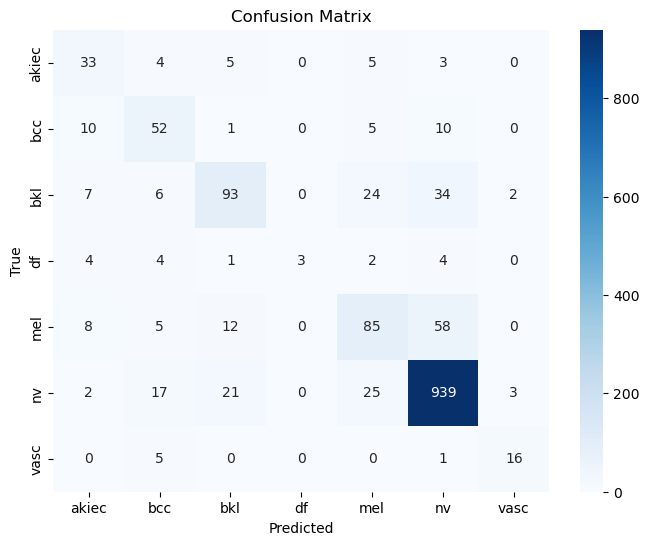

In [11]:

# -------------------------------
# Step 6: Evaluate Model
# -------------------------------
from sklearn.metrics import accuracy_score

# Load best model
model.load_state_dict(torch.load("best_skin_model.pth", map_location=device))
model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for imgs, labels in test_loader:
        imgs = imgs.to(device)
        outputs = model(imgs)
        preds = outputs.argmax(1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

# Accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f"\n🎯 Test Accuracy: {accuracy*100:.2f}%\n")

# Classification report
print("📘 Classification Report:")
print(classification_report(all_labels, all_preds, target_names=classes))

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [4]:
# -------------------------------
# Step 7: Predict on New Image
# -------------------------------
def predict_image(image_path):
    model.eval()

    img = Image.open(image_path).convert("RGB")
    img_np = np.array(img)

    img_t = val_transform(image=img_np)["image"].unsqueeze(0).to(device)

    with torch.no_grad():
        out = model(img_t)
        pred = out.argmax(1).item()
        conf = torch.softmax(out, dim=1)[0][pred].item()

    print(f"🔍 Predicted: {classes[pred]}  (Confidence: {conf*100:.2f}%)")
    return classes[pred], conf

# Test predictio
# predict_image("dataset_split/test/akiec/ISIC_0024468.jpg")


In [19]:
predict_image("dataset_split/test/df/ISIC_0024845.jpg")

🔍 Predicted: nv  (Confidence: 57.35%)


(np.str_('nv'), 0.5735183358192444)

In [20]:
predict_image("dataset_split/test/df/ISIC_0025373.jpg")

🔍 Predicted: df  (Confidence: 44.57%)


(np.str_('df'), 0.4456980526447296)

In [21]:
predict_image("dataset_split/test/vasc/ISIC_0026349.jpg")

🔍 Predicted: vasc  (Confidence: 97.81%)


(np.str_('vasc'), 0.9781027436256409)

In [22]:
!pip install opencv-python

In [9]:
# -------------------------------
# GRAD-CAM FOR EFFICIENTNET-B0 (WORKING VERSION)
# -------------------------------
import cv2
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer

        self.gradients = None
        self.activations = None

        # Forward hook → get feature maps
        target_layer.register_forward_hook(self.forward_hook)

        # Backward hook → get gradients
        target_layer.register_backward_hook(self.backward_hook)

    def forward_hook(self, module, input, output):
        # Save activations (feature maps)
        self.activations = output.detach()

    def backward_hook(self, module, grad_in, grad_out):
        # Save gradients from backprop
        self.gradients = grad_out[0].detach()

    def generate_cam(self, input_tensor):
        # Forward pass
        output = self.model(input_tensor)

        pred_class = output.argmax(dim=1)
        pred_score = output[0, pred_class]

        # Backward pass
        self.model.zero_grad()
        pred_score.backward(retain_graph=True)

        # Get gradients & activations
        grads = self.gradients
        activs = self.activations

        # Global average pooling of gradients
        weights = grads.mean(dim=(1, 2), keepdim=True)

        # Build weighted cam
        cam = (weights * activs).sum(dim=0)
        cam = cam.cpu().numpy()

        # ReLU
        cam = np.maximum(cam, 0)

        # Normalize
        cam = cam / (cam.max() + 1e-8)
        return cam, int(pred_class)


# def show_gradcam(image_path):
#     model.eval()

#     # Load image
#     img = Image.open(image_path).convert("RGB")
#     img_np = np.array(img)

#     # Preprocess
#     img_t = val_transform(image=img_np)["image"].unsqueeze(0).to(device)

#     # EfficientNet-B0 last conv layer
#     target_layer = model.conv_head

#     # GradCAM instance
#     gc = GradCAM(model, target_layer)

#     # Generate heatmap
#     cam, pred_idx = gc.generate_cam(img_t)

    # # Resize CAM to original image
    # heatmap = cv2.applyColorMap((cam * 255).astype("uint8"), cv2.COLORMAP_JET)
    # heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
    # heatmap = cv2.resize(heatmap, (img_np.shape[1], img_np.shape[0]))

    # overlay = (0.5 * heatmap + 0.5 * img_np).astype("uint8")

    # # Plot
    # plt.figure(figsize=(12, 5))

    # plt.subplot(1, 3, 1)
    # plt.title("Original")
    # plt.imshow(img_np)
    # plt.axis("off")

    # plt.subplot(1, 3, 2)
    # plt.title("Grad-CAM Heatmap")
    # plt.imshow(heatmap)
    # plt.axis("off")

    # plt.subplot(1, 3, 3)
    # plt.title(f"Overlay\nPredicted: {classes[pred_idx]}")
    # plt.imshow(overlay)
    # plt.axis("off")

    # plt.show()


# def show_gradcam(image_path):
#     model.eval()

#     # Load image
#     img = Image.open(image_path).convert("RGB")
#     img_np = np.array(img)

#     # Preprocess
#     img_t = val_transform(image=img_np)["image"].unsqueeze(0).to(device)

    # # EfficientNet-B0 last conv layer
    # target_layer = model.conv_head

    # gc = GradCAM(model, target_layer)
    # cam, pred_idx = gc.generate_cam(img_t)

    # # --------------------
    # # FIX: squeeze and convert cam to 2D uint8
    # # --------------------
    # cam = cam.squeeze()                       # (H, W)
    # cam_uint8 = (cam * 255).astype(np.uint8)  # convert to uint8

    # # Apply colormap
    # heatmap = cv2.applyColorMap(cam_uint8, cv2.COLORMAP_JET)
    # heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    # # Resize heatmap
    # heatmap = cv2.resize(heatmap, (img_np.shape[1], img_np.shape[0]))

    # # Overlay heatmap
    # overlay = (0.5 * heatmap + 0.5 * img_np).astype(np.uint8)

    # # # Plot
    # plt.figure(figsize=(12, 5))

    # plt.subplot(1, 3, 1)
    # plt.title("Original")
    # plt.imshow(img_np)
    # plt.axis("off")

    # plt.subplot(1, 3, 2)
    # plt.title("Grad-CAM Heatmap")
    # plt.imshow(heatmap)
    # plt.axis("off")

    # plt.subplot(1, 3, 3)
    # plt.title(f"Overlay\nPrediction: {classes[pred_idx]}")
    # plt.imshow(overlay)
    # plt.axis("off")

    # plt.show()



def show_gradcam(image_path):
    model.eval()

    img = Image.open(image_path).convert("RGB")
    img_np = np.array(img)

    img_t = val_transform(image=img_np)["image"].unsqueeze(0).to(device)

    target_layer = model.conv_head
    gc = GradCAM(model, target_layer)

    cam, pred_idx = gc.generate_cam(img_t)

    # -------------------------
    # UNIVERSAL SAFE FIX
    # -------------------------
    cam = np.squeeze(cam)

    if cam.ndim != 2:
        cam = cam.mean(axis=0)

    cam = cam - cam.min()
    cam = cam / (cam.max() + 1e-8)

    cam_uint8 = (cam * 255).astype(np.uint8)

    print("CAM SHAPE =", cam_uint8.shape, " | dtype =", cam_uint8.dtype)

    # Color map
    heatmap = cv2.applyColorMap(cam_uint8, cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
    heatmap = cv2.resize(heatmap, (img_np.shape[1], img_np.shape[0]))

    overlay = (0.5 * heatmap + 0.5 * img_np).astype("uint8")

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 3, 1)
    plt.title("Original")
    plt.imshow(img_np)
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.title("Grad-CAM Heatmap")
    plt.imshow(heatmap)
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.title(f"Overlay\nPredicted: {classes[pred_idx]}")
    plt.imshow(overlay)
    plt.axis("off")

    plt.show()





# Example usage:
# show_gradcam("dataset_split/test/vasc/ISIC_0026349.jpg")


CAM SHAPE = (7, 7)  | dtype = uint8


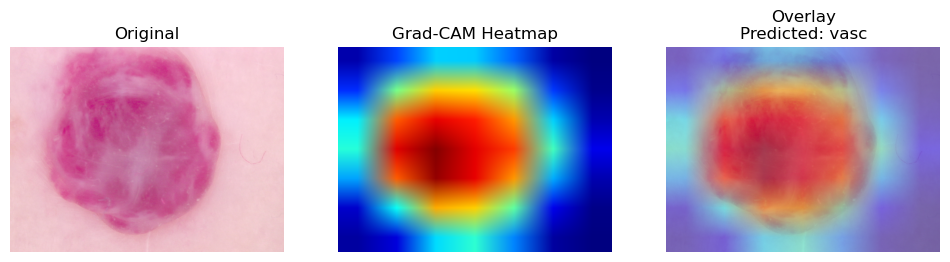

In [32]:
show_gradcam("dataset_split/test/vasc/ISIC_0026349.jpg")


In [40]:
torch.save(model.state_dict(), "best_skin_model.pth")


In [41]:
import joblib
joblib.dump(train_dataset.le, "label_encoder.pkl")


['label_encoder.pkl']

In [42]:
import json
with open("classes.json", "w") as f:
    json.dump(classes.tolist(), f)


In [ ]:
# best_skin_model.pth
# label_encoder.pkl
# classes.json


In [3]:
import torch
import timm
import joblib
import json

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load classes
with open("classes.json", "r") as f:
    classes = json.load(f)

# Load label encoder
le = joblib.load("label_encoder.pkl")

# Create model
model = timm.create_model("efficientnet_b0", pretrained=False, num_classes=len(classes))
state_dict = torch.load("best_skin_model.pth", map_location=device, weights_only=True)
model.load_state_dict(state_dict)
model.to(device)
model.eval()


EfficientNet(
  (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNormAct2d(
    32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
    (drop): Identity()
    (act): SiLU(inplace=True)
  )
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn1): BatchNormAct2d(
          32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): SiLU(inplace=True)
        )
        (aa): Identity()
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
          (gate): Sigmoid()
        )
        (conv_pw): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2

In [8]:
predict_image("dataset_split/test/bkl/ISIC_0029559.jpg")

🔍 Predicted: bkl  (Confidence: 47.79%)


(np.str_('bkl'), 0.4778793454170227)

CAM SHAPE = (7, 7)  | dtype = uint8


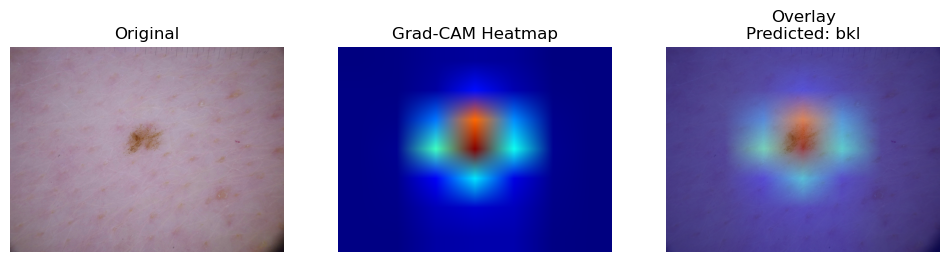

In [38]:
show_gradcam("dataset_split/test/bkl/ISIC_0029559.jpg")


C:\Users\Varun C M\anaconda3\envs\skin_cnn\lib\site-packages\torch\nn\modules\module.py:1827: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


CAM SHAPE = (7, 7)  | dtype = uint8


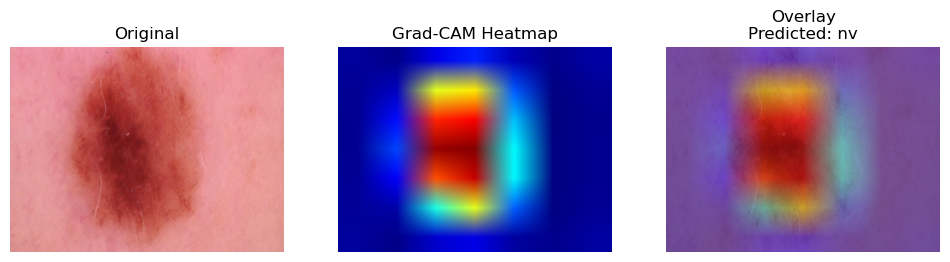

In [10]:
show_gradcam("dataset_split/test/nv/ISIC_0026035.jpg")
